<h2>Problem Statement:</h2>

Through the analysis and modeling of the Aimes, Iowa dataset of 2006 - 2010 home sales, can a best mix of features be constructed to predict the sale price of homes in a given market? 

<h1>Exploratory Data Analysis & Cleaning<h1>

<h2>Import Packages<h2>

In [64]:
#basic DS packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#for all models
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, PowerTransformer
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm

#for regression models
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV


#for Jupyter notebook:
%matplotlib inline

<h2>Import Data into DataFrame<h2>

In [65]:
df = pd.read_csv('./datasets/train.csv')
outside_df = pd.read_csv('./datasets/test.csv')

In [66]:
#Remove the max column setting in pandas

pd.options.display.max_columns = None
pd.options.display.max_rows = None

<h2>Explore the Data</h2>

<h4>How many rows and columns are we dealing with?</h4>

In [67]:
#2051 rows and 81 columns of data

df.shape

(2051, 81)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

### Drop Outliers

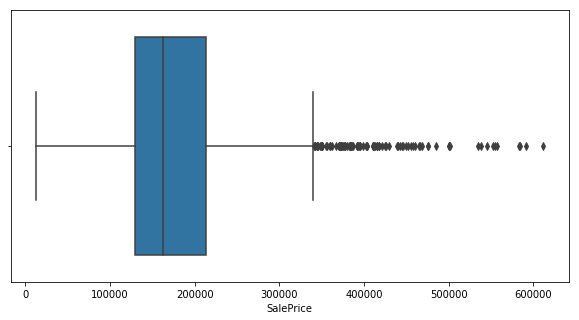

In [69]:
plt.figure(figsize = (10,5))

sns.boxplot(df['SalePrice'])

In [70]:
df.sort_values('SalePrice', ascending = False).head(8)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1671,45,528150070,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2009,2010,Hip,CompShg,VinylSd,VinylSd,Stone,760.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2188.0,Unf,0.0,142.0,2330.0,GasA,Ex,Y,SBrkr,2364,0,0,2364,1.0,0.0,2,1,2,1,Ex,11,Typ,2,Gd,Attchd,2009.0,Fin,3.0,820.0,TA,TA,Y,0,67,0,0,0,0,NaN,NaN,NaN,0,3,2010,New,611657
1964,1638,527216080,20,RL,52.0,51974,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,PosN,Norm,1Fam,1Story,9,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,BrkFace,710.0,Ex,TA,PConc,Ex,TA,Av,GLQ,1101.0,Unf,0.0,1559.0,2660.0,GasA,Ex,Y,SBrkr,2338,0,0,2338,1.0,0.0,2,1,4,1,Gd,8,Typ,2,Gd,Attchd,2005.0,Fin,3.0,1110.0,Gd,TA,Y,0,135,0,0,322,0,NaN,NaN,NaN,0,6,2007,New,591587
1692,2451,528360050,60,RL,114.0,17242,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,9,5,1993,1994,Hip,CompShg,MetalSd,MetalSd,BrkFace,738.0,Gd,Gd,PConc,Ex,TA,Gd,Rec,292.0,GLQ,1393.0,48.0,1733.0,GasA,Ex,Y,SBrkr,1933,1567,0,3500,1.0,0.0,3,1,4,1,Ex,11,Typ,1,TA,Attchd,1993.0,RFn,3.0,959.0,TA,TA,Y,870,86,0,0,210,0,NaN,NaN,NaN,0,5,2006,WD,584500
1796,434,528110090,60,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,424.0,Ex,TA,PConc,Ex,TA,Gd,Unf,0.0,Unf,0.0,1734.0,1734.0,GasA,Ex,Y,SBrkr,1734,1088,0,2822,0.0,0.0,3,1,4,1,Ex,12,Typ,1,Gd,BuiltIn,2009.0,RFn,3.0,1020.0,TA,TA,Y,52,170,0,0,192,0,NaN,NaN,NaN,0,1,2009,New,582933
151,2333,527212030,60,RL,85.0,16056,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,1Fam,2Story,9,5,2005,2006,Hip,CompShg,CemntBd,CmentBd,Stone,208.0,Gd,TA,PConc,Ex,TA,Av,GLQ,240.0,Unf,0.0,1752.0,1992.0,GasA,Ex,Y,SBrkr,1992,876,0,2868,0.0,0.0,3,1,4,1,Ex,11,Typ,1,Gd,BuiltIn,2005.0,Fin,3.0,716.0,TA,TA,Y,214,108,0,0,0,0,NaN,NaN,NaN,0,7,2006,New,556581
1164,424,528106020,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1767.0,ALQ,539.0,788.0,3094.0,GasA,Ex,Y,SBrkr,2402,0,0,2402,1.0,0.0,2,0,2,1,Ex,10,Typ,2,Gd,Attchd,2008.0,Fin,3.0,672.0,TA,TA,Y,0,72,0,0,170,0,NaN,NaN,NaN,0,4,2009,WD,555000
623,457,528176030,20,RL,100.0,14836,Pave,NaN,IR1,HLS,AllPub,Inside,Mod,NridgHt,Norm,Norm,1Fam,1Story,10,5,2004,2005,Hip,CompShg,CemntBd,CmentBd,Stone,730.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2146.0,Unf,0.0,346.0,2492.0,GasA,Ex,Y,SBrkr,2492,0,0,2492,1.0,0.0,2,1,2,1,Ex,8,Typ,1,Ex,Attchd,2004.0,Fin,3.0,949.0,TA,TA,Y,226,235,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,552000
138,2331,527210040,60,RL,60.0,18062,Pave,NaN,IR1,HLS,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,1Fam,2Story,10,5,2006,2006,Hip,CompShg,CemntBd,CmentBd,BrkFace,662.0,Ex,TA,PConc,Ex,TA,Gd,Unf,0.0,Unf,0.0,1528.0,1528.0,GasA,Ex,Y,SBrkr,1528,1862,0,3390,0.0,0.0,3,1,5,1,Ex,10,Typ,1,Ex,BuiltIn,2006.0,Fin,3.0,758.0,TA,TA,Y,204,34,0,0,0,0,NaN,NaN,NaN,0,9,2006,New,545224


In [71]:
#Drop sale price outlier

#df.drop([1628,183] , inplace = True)

<h2>Dealing with NaN's</h2>

<h3>Consult the Data Dictionary

<h4>Determine NaN's for Categorical Data and Replace/Drop</h4>

In [72]:
#Calculate null quantities for all categorical columns, and replace NaN with none.
#I have manually checked the data dictionary to confirm that this is an adequate solution.

null_cat_columns = []  #Saves list of the NaN category columns that have been filled with 'None'. Only for reference.  

for i in df:
    if (df[i].isnull().sum() > 0) & (df[i].dtype == 'O'):
        null_cat_columns.append(i)
        df[i].fillna('None', inplace = True)


In [73]:
#Above for outside df

for i in outside_df:
    if (outside_df[i].isnull().sum() > 0) & (outside_df[i].dtype == 'O'):
        null_cat_columns.append(i)
        outside_df[i].fillna('None', inplace = True)

In [74]:
outside_df.isnull().sum()

Id                   0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       160
Lot Area             0
Street               0
Alley                0
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type         0
Mas Vnr Area         1
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual            0
Bsmt Cond            0
Bsmt Exposure        0
BsmtFin Type 1       0
BsmtFin SF 1         0
BsmtFin Type 2       0
BsmtFin SF 2         0
Bsmt Unf SF          0
Total Bsmt SF        0
Heating              0
Heating QC           0
Central Air          0
Electrical 

<h4>Determine NaN's for Non-Categorical Data and Replace/Drop</h4>

In [75]:
#List null quantities for non-categorical quantities.
#These lists are useful because there are SO many columns, that many get cut off when checking manually with .isnull()

for i in df:
    if (df[i].isnull().sum() > 0):
        print(f'{i}: \nTotal: {df[i].isnull().sum()}\nPct: {df[i].isnull().mean()}\n')

Lot Frontage: 
Total: 330
Pct: 0.16089712335446124

Mas Vnr Area: 
Total: 22
Pct: 0.010726474890297415

BsmtFin SF 1: 
Total: 1
Pct: 0.00048756704046806434

BsmtFin SF 2: 
Total: 1
Pct: 0.00048756704046806434

Bsmt Unf SF: 
Total: 1
Pct: 0.00048756704046806434

Total Bsmt SF: 
Total: 1
Pct: 0.00048756704046806434

Bsmt Full Bath: 
Total: 2
Pct: 0.0009751340809361287

Bsmt Half Bath: 
Total: 2
Pct: 0.0009751340809361287

Garage Yr Blt: 
Total: 114
Pct: 0.05558264261335934

Garage Cars: 
Total: 1
Pct: 0.00048756704046806434

Garage Area: 
Total: 1
Pct: 0.00048756704046806434



In [76]:
df['Lot Frontage'].describe()

count    1721.000000
mean       69.055200
std        23.260653
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: Lot Frontage, dtype: float64

In [77]:
#Replace NaN's with 0 for Masonry Veneer Type, Basement Half Bath, and Basement Full Bath

df['Lot Frontage'].fillna(69, inplace = True) # 69 is the mean value of the category
df['Mas Vnr Area'].fillna(0, inplace = True)
df['Bsmt Half Bath'].fillna(0, inplace = True)
df['Bsmt Full Bath'].fillna(0, inplace = True)

In [78]:
outside_df['Lot Frontage'].describe()

count    719.000000
mean      69.630042
std       23.625372
min       21.000000
25%       59.000000
50%       68.000000
75%       80.000000
max      182.000000
Name: Lot Frontage, dtype: float64

In [79]:
outside_df['Lot Frontage'].fillna(69, inplace = True) # 69 is the mean value of the category
outside_df['Mas Vnr Area'].fillna(0, inplace = True)




<h4>Drop Unecessary Columns with too many NaN's to Manually Resolve</h4>

In [80]:
#Columns to drop

drop_columns = ['Garage Yr Blt']

In [81]:
df.drop(drop_columns, axis = 1, inplace = True)
outside_df.drop(drop_columns, axis = 1, inplace = True)

<h4>Manually isolate and replace remmaining NaN's</h4>

In [82]:
#Only row with NaN in specific basement columns

df.iloc[1327] = df.iloc[1327].fillna(0)

In [83]:
#Only row with NaN in specific garage columns

df.iloc[1712] = df.iloc[1712].fillna(0)

In [84]:
outside_df.isnull().sum().sum()

0

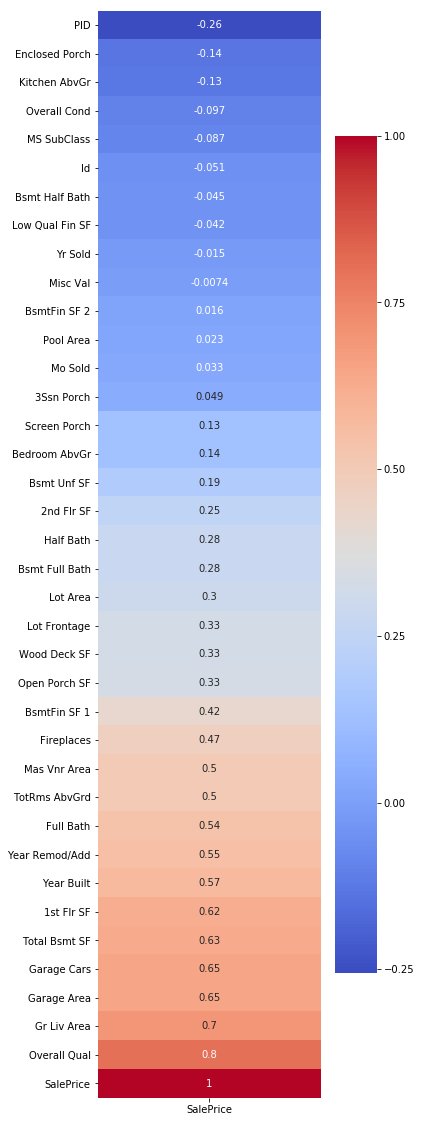

In [85]:
plt.figure(figsize = (5,20))

sns.heatmap(df.corr()[['SalePrice']].sort_values('SalePrice'), annot = True, cmap = 'coolwarm')

<h2>Data Type Adjustment</h2>

In [86]:
df.dtypes

Id                   int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
B

<u><b>Note:</b></u>  Any categorical changes should be processed on both datasets simultaneously

<h4>Categorize Month & Year Sold (and Dummy)</h4>

In [87]:
#Create dummy df's for month and year, to be concatenated with the full df, but also available for later analysis.

#For inside dataframe

mo_sold_dummy = pd.get_dummies(df['Mo Sold'], drop_first = True)
yr_sold_dummy = pd.get_dummies(df['Yr Sold'], drop_first = True)
mo_and_year_dummy = pd.concat([mo_sold_dummy, yr_sold_dummy], axis = 1)

neighborhood_dummy = pd.get_dummies(df['Neighborhood'])

# #For outside dataframe

mo_sold_dummy_out = pd.get_dummies(outside_df['Mo Sold'], drop_first = True)
yr_sold_dummy_out = pd.get_dummies(outside_df['Yr Sold'], drop_first = True)
mo_and_year_outside_dummy = pd.concat([mo_sold_dummy_out, yr_sold_dummy_out], axis = 1)

neighborhood_out_dummy = pd.get_dummies(outside_df['Neighborhood'])

In [88]:
neighborhood_dummy.columns

Index(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
       'Crawfor', 'Edwards', 'Gilbert', 'Greens', 'GrnHill', 'IDOTRR',
       'Landmrk', 'MeadowV', 'Mitchel', 'NAmes', 'NPkVill', 'NWAmes',
       'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW',
       'Somerst', 'StoneBr', 'Timber', 'Veenker'],
      dtype='object')

<h4>Create Polynomial Calendar Features</h4>

In [89]:
#instantiate a Polynomial Features variable.

poly = PolynomialFeatures(include_bias = False)

In [90]:
#Create a polynomial feature database of month and year combinations.  Irrational ones (i.e. Feb * Mar) to be dropped a few rows down.

#inside dataframe

mo_yr_poly = poly.fit_transform(mo_and_year_dummy)
mo_yr_poly_df = pd.DataFrame(mo_yr_poly, columns = poly.get_feature_names(mo_and_year_dummy.columns.astype(str)))


# #outside dataframe

mo_yr_poly_out = poly.fit_transform(mo_and_year_outside_dummy)
mo_yr_poly_outside_df = pd.DataFrame(mo_yr_poly_out, columns = poly.get_feature_names(mo_and_year_outside_dummy.columns.astype(str)))







In [91]:
mo_yr_poly_df.columns

Index(['2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       ...
       '2007^2', '2007 2008', '2007 2009', '2007 2010', '2008^2', '2008 2009',
       '2008 2010', '2009^2', '2009 2010', '2010^2'],
      dtype='object', length=135)

In [92]:
#inside neighbs
neighborhood_dummy = pd.get_dummies(df['Neighborhood'])

#outside neighbs
outside_neighborhood_dummy = pd.get_dummies(outside_df['Neighborhood'])

In [93]:
#inside neighbs

for hood in neighborhood_dummy.columns:
    neighborhood_dummy[hood] = neighborhood_dummy[hood]

In [94]:
#outside neighbs

for hood in outside_neighborhood_dummy.columns:
    outside_neighborhood_dummy[hood] = outside_neighborhood_dummy[hood]

In [95]:
#Manually Created Polynomial Features influenced by above correlations.

df['Qual2'] = df['Overall Qual']**2
# df['BasmtSF_Qual'] = df['Total Bsmt SF'] * df['Overall Qual']
# df['YearBuilt_Qual'] = df['Year Built'] * df['Overall Qual']
# df['GarageArea_Qual'] = df['Garage Area'] * df['Overall Qual']
df['LivArea_Qual'] = df['Gr Liv Area'] * df['Overall Qual']
# df['LivArea_GarageArea_Qual'] = df['LivArea_Qual'] * df['Garage Area']



#Apply the above manual features to the outside data set.

outside_df['Qual2'] = outside_df['Overall Qual']**2
# outside_df['BasmtSF_Qual'] = outside_df['Total Bsmt SF'] * outside_df['Overall Qual']
# outside_df['YearBuilt_Qual'] = outside_df['Year Built'] * outside_df['Overall Qual']
# outside_df['GarageArea_Qual'] = outside_df['Garage Area'] * outside_df['Overall Qual']
outside_df['LivArea_Qual'] = outside_df['Gr Liv Area'] * outside_df['Overall Qual']
# outside_df['LivArea_GarageArea_Qual'] = outside_df['LivArea_Qual'] * outside_df['Garage Area']


In [96]:
df['log'] = np.log(df['SalePrice'])
df['log_LAQ'] = np.log(df['LivArea_Qual'])

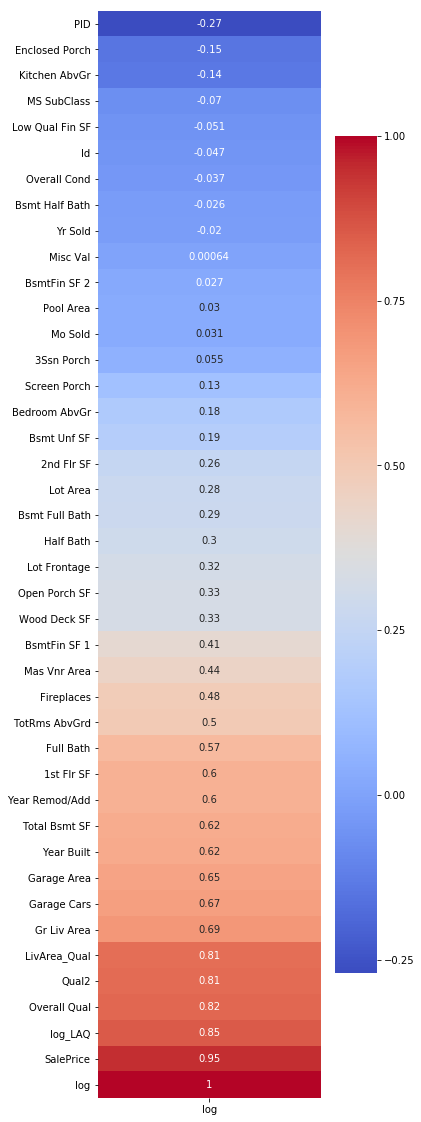

In [97]:
plt.figure(figsize = (5,20))

sns.heatmap(df.corr()[['log']].sort_values('log'), annot = True, cmap = 'coolwarm')

In [98]:
df.drop(['log', 'log_LAQ'], axis = 1, inplace = True)

In [99]:
list_of_ordinals = ['Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Kitchen Qual',
                   'Garage Qual', 'Garage Cond', 'Pool QC']

for i in df[list_of_ordinals]:

    df[i] = df[i].map({'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, 'None' : 0})
    
    
for i in outside_df[list_of_ordinals]:

    outside_df[i] = outside_df[i].map({'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, 'None' : 0})
    

In [100]:
ord_df = df[list_of_ordinals].head()
ord_df['SalePrice'] = df['SalePrice']

In [101]:
ord_df.head()

,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Kitchen Qual,Garage Qual,Garage Cond,Pool QC,SalePrice
0,4,3,3,3,4,3,3,0,130500
1,4,3,4,3,4,3,3,0,220000
2,3,4,3,3,4,3,3,0,109000
3,3,3,4,3,3,3,3,0,174000
4,3,3,2,4,3,3,3,0,138500


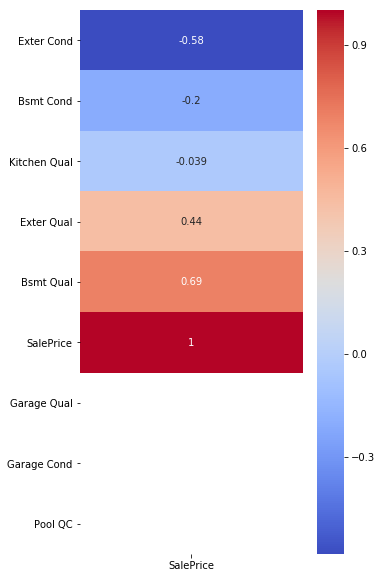

In [102]:
plt.figure(figsize=(5,10))

sns.heatmap(ord_df.corr()[['SalePrice']].sort_values('SalePrice'), annot = True, cmap = 'coolwarm')

In [103]:
# Manually created list of categorical variables to be dummied.  

list_to_dummy = ['Overall Qual','Sale Type','MS SubClass', 'MS Zoning', 'Street', 'Alley','Lot Shape', 'Land Contour',
                 'Utilities', 'Lot Config', 'Land Slope','Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 
                 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
                 'Foundation','Bsmt Exposure','BsmtFin Type 1',
                 'BsmtFin Type 2','Heating','Heating QC','Central Air','Electrical','Functional',
                 'Fireplace Qu','Garage Type','Garage Finish','Paved Drive',
                 'Fence','Misc Feature']
                 
                 
                 #'Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Kitchen Qual',
                 #'Garage Qual', 'Garage Cond', 'Pool QC']


In [104]:
df.shape

(2051, 82)

In [105]:
df.head(1)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Qual2,LivArea_Qual
0,109,533352170,60,RL,69.0,13517,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,CBlock,3,3,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,Typ,0,None,Attchd,RFn,2.0,475.0,3,3,Y,0,44,0,0,0,0,0,None,None,0,3,2010,WD,130500,36,8874


In [106]:
outside_df.shape

(879, 81)

In [107]:
#Create and add dummy columns from the above dummy list to 'df'

df = pd.get_dummies(df, columns=list_to_dummy, drop_first = False)

In [108]:
df.shape

(2051, 270)

In [109]:
#Create and add dummy columns from the above dummy list to 'outside_df'

outside_df = pd.get_dummies(outside_df, columns=list_to_dummy, drop_first = False)

In [110]:
outside_df.shape

(879, 256)

In [111]:
#Merge dataframe ('df') with calendar dataframes

df = pd.concat([df, mo_yr_poly_df], axis = 1)
outside_df = pd.concat([outside_df, mo_yr_poly_outside_df], axis = 1)

In [112]:
#Merge dataframes with Neighborhoods


df = pd.concat([df, neighborhood_dummy], axis = 1)
outside_df = pd.concat([outside_df, outside_neighborhood_dummy], axis = 1)

In [113]:
#print shape of calendar polynomial features

print(mo_yr_poly_df.shape)
print(mo_yr_poly_outside_df.shape)

(2051, 135)
(879, 135)


In [114]:
#Additional Manually Created Polynomial Features influenced by above correlations.

# df['TA_cond'] = df['Exter Qual_TA'] * df['Overall Cond']
# df['TA_combo'] = df['Exter Qual_TA'] * df['Kitchen Qual_TA']
# df['TA_KitchBsmt'] = df['Kitchen Qual_TA'] * df['Bsmt Qual_TA']
# df['QualCond_LivArea'] = df['LivArea_Qual'] * df['Overall Cond']
# df['LivArea_Cond'] = df['Gr Liv Area'] * df['Overall Cond']
# df['YearBuilt_Qual'] = df['Overall Qual'] * df['Year Built']
# df['YearRemod_Qual'] = df['Overall Qual'] * df['Year Remod/Add']

# outside_df['TA_cond'] = outside_df['Exter Qual_TA'] * outside_df['Overall Cond']
# outside_df['TA_combo'] = outside_df['Exter Qual_TA'] * outside_df['Kitchen Qual_TA']
# outside_df['TA_KitchBsmt'] = outside_df['Kitchen Qual_TA'] * outside_df['Bsmt Qual_TA']
# outside_df['QualCond_LivArea'] = outside_df['LivArea_Qual'] * outside_df['Overall Cond']
# outside_df['LivArea_Cond'] = outside_df['Gr Liv Area'] * outside_df['Overall Cond']
# outside_df['YearBuilt_Qual'] = outside_df['Overall Qual'] * outside_df['Year Built']
# outside_df['YearRemod_Qual'] = outside_df['Overall Qual'] * outside_df['Year Remod/Add']

In [115]:
#print df and outside df features

print(df.shape)
print(outside_df.shape)

(2051, 433)
(879, 417)


<h3>Declare target column</h3>

In [116]:
#Pull out 'SalePrice' before trimming dummy columns from dataframes
y = df['SalePrice']

<h3>Drop Columns with Zero Data in Either Dataframe</h3>

In [117]:
#Drop all dummy columns in df that doesn't have any values.  No value add if there is no data in the training df.

# for col in df:
#     if (df[col].min() == False) & (df[col].max() == False):
#         df.drop(col, axis = 1, inplace = True)

In [118]:
df.shape

(2051, 433)

In [119]:
#Drop columns that are only in the main 'df'

for col in outside_df:
    if col not in df:
        outside_df.drop([col], axis = 1, inplace = True)

In [120]:
#Drop columns only in the 'outside' dataframe.

for col in df:
    if col not in outside_df:
        df.drop([col], axis = 1, inplace = True)

In [121]:
#Confirm shape of df
df.shape

(2051, 408)

In [122]:
#COnfirm the shape of outside df

outside_df.shape

(879, 408)

In [123]:
df.isnull().sum().sum()

0

<h2>Feature Selection</h2>

In [125]:
#Prepare the data to model

features = [col for col in df._get_numeric_data().columns]  #Thank Riley for this gem
X = df[features].drop(columns = ['Id', 'PID'])  #matrix

for feature in X:
    X[feature] = X[feature] * np.log(df['LivArea_Qual'])

y = np.log(y)  #vector


In [126]:
#Prepare the outside data set

outside_features = [col for col in outside_df._get_numeric_data().columns]

outside_X = outside_df[outside_features].drop(columns = ['Id', 'PID'])  #matrix

for feature in outside_X:
    outside_X[feature] = outside_X[feature] * np.log(outside_df['LivArea_Qual'])

In [127]:
X.shape

(2051, 405)

In [128]:
outside_X.shape

(879, 405)

<h3>Below 2 Cells for Intermediate Correlation Visualization ONLY</h4>

In [ ]:
#Re-Explore correlations with 'SalePrice' before setting up model

X['SalePrice'] = y

plt.figure(figsize = (5,90))



sns.heatmap(X.corr()[['SalePrice']].sort_values('SalePrice'), annot = True, cmap = 'coolwarm')


X.drop('SalePrice', axis = 1, inplace = True)

<h2>Instantiate and Build Model</h2>

In [ ]:
#Instantiate the model on the Linear Regression class 

model = LinearRegression()

In [ ]:
model.fit(X,y)

In [ ]:
# After fitting our model, we can generate predictions.
y_pred = model.predict(X)

In [ ]:
#The default score on regression model in sklearn is R^2.  Below is the R^2 of the model

model.score(X, y)

In [ ]:
rmse = np.sqrt(mean_squared_error(y, y_pred))
rmse

In [ ]:
#The model's coefficients

coef = model.coef_
yint = model.intercept_

In [ ]:
#Calculate the residuals and find their mean

residuals = y - y_pred
residuals.mean()

plt.scatter(x = y_pred, y = residuals)
plt.axhline(0, color='r')


In [ ]:
df['residuals'] = residuals

In [ ]:
df.sort_values('residuals', ascending = True).head(20)

In [ ]:
#Low Outlier Residuals

X.drop([960,1885,125,348], inplace = True)
y.drop([960,1885,125,348], inplace = True)

#
X.drop([1628,183], inplace = True)
y.drop([1628,183], inplace = True)


#High Outlier Residuals

X.drop([1796, 1671, 151, 1692, 304, 463, 1136, 1164], inplace = True)
y.drop([1796, 1671, 151, 1692, 304, 463, 1136, 1164], inplace = True)

## Model Prep: Train/test split

Below is code for a Train / Test Split.  Since there is an outside dataset to test the model with, The 'train_test_split' function will be used only to compare results with using the full inside dataset to train the model, with splitting it internally as well as externally.  After optimization, training the model with the FULL original dataframe has yielded better results.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=35235)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

## Model Prep: `PowerTransformer`

In the cell below, fit a `PowerTransformer` to `X_train` and use it to transform both `X_train` and `X_test`.

In [ ]:
pt = PowerTransformer()
pt.fit(X_train)
X_train_pt = pt.transform(X_train)
X_test_pt = pt.transform(X_test)
outside_X_pt = pt.transform(outside_X)

We also want to transform our target to resemble a normal distribution, so we'll create another `PowerTrasformer` for our `y`.

In [ ]:
pt_y = PowerTransformer()
# PowerTransformer requires a matrix/DataFrame, which is why we're using the .to_frame() method on y_train
pt_y.fit(y_train.to_frame()) 
y_train_pt = pt_y.transform(y.to_frame())
y_test_pt = pt_y.transform(y_test.to_frame())

<h3>STANDARD SCALAR TO TRANSFORM DATA INTO Z-SCORES</h3>

In [158]:
ss = StandardScaler()
ss.fit(X)  #Learning the mean and standard deviation for each column.  IMPORTANT
X_scaled = ss.transform(X)

In [159]:
X.shape


(2047, 405)

In [ ]:
X_scaled_test = ss.transform(X_test)

In [ ]:
X_scaled_test.shape

In [160]:
outside_X_scaled = ss.transform(outside_X)

In [161]:
outside_X_scaled.shape

(879, 405)

## Model Prep: Instantiate our models

We'll be evaluating `LinearRegression`, `LassoCV` and `RidgeCV`, so we'll need to create instances of all three models.

In [138]:
lr = LinearRegression()

In [156]:
lasso = LassoCV(n_alphas=200, cv=5)

In [140]:
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

In [ ]:
elastic_net = ElasticNetCV(alphas=np.linspace(0.5, 1.0, 100), l1_ratio=0.5, cv=5)

## Cross validation

Using `cross_val_score` to evaluate all three models.

In [ ]:
X_train.shape

In [164]:
lr_scores = cross_val_score(lr, X, y, cv=5)
lr_scores.mean()

0.9141174833715041

In [163]:
lasso_scores = cross_val_score(lasso, X_scaled, y, cv=7)
lasso_scores.mean()

0.9218312686048542

In [165]:
ridge_scores = cross_val_score(ridge, X_scaled, y, cv=7)
ridge_scores.mean()

0.9114430630852984

In [ ]:
elastic_net_scores = cross_val_score(elastic_net, X_scaled, y, cv=7)
elastic_net_scores.mean()

## Model Fitting and Evaluation

<h3>Using Ridge Regression with Cross Validation</h3>

In [ ]:
ridge.fit(X_scaled, y)

In [ ]:
ridge.score(X_scaled, y)

In [ ]:
ridge.score(X_scaled_test, y_test)

In [ ]:
ridge_scores.mean()

In [ ]:
ridge_pred = ridge.predict(X_scaled)
rmse = np.sqrt(mean_squared_error(y, ridge_pred))
rmse

<h3> Using Lasso Regression with Cross Validation</h3>

In [166]:
lasso.fit(X_scaled, y)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=200, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [167]:
lasso.score(X_scaled, y)

0.9369019268897936

In [147]:
lasso.score(X_scaled_test, y_test)

NameError: name 'X_scaled_test' is not defined

In [168]:
lasso_scores.mean()

0.9218312686048542

In [169]:
lasso_pred = lasso.predict(X_scaled)

In [170]:
rmse = np.sqrt(mean_squared_error(y, lasso_pred))
rmse

0.008437837233933118

### Plot Residuals

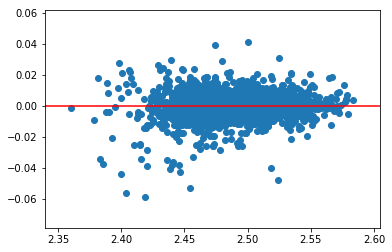

In [171]:
#Calculate the residuals and find their mean

residuals = y - lasso_pred
residuals.mean()

plt.scatter(x = lasso_pred, y = residuals)
plt.axhline(0, color='r')


In [172]:
df['residuals'] = residuals

In [173]:
df.sort_values('residuals', ascending = True).head(10)

,Id,PID,Lot Frontage,Lot Area,Neighborhood,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Garage Qual,Garage Cond,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Misc Val,Mo Sold,Yr Sold,Qual2,LivArea_Qual,Overall Qual_2,Overall Qual_3,Overall Qual_4,Overall Qual_5,Overall Qual_6,Overall Qual_7,Overall Qual_8,Overall Qual_9,Overall Qual_10,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS SubClass_120,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,Lot Shape_IR1,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_AllPub,Utilities_NoSewr,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Gtl,Land Slope_Mod,Land Slope_Sev,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsbShng,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsbShng,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkCmn,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Bsmt Exposure_Av,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,Bsmt Exposure_None,BsmtFin Type 1_ALQ,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_None,BsmtFin Type 1_Rec,BsmtFin Type 1_Unf,BsmtFin Type 2_ALQ,BsmtFin Type 2_BLQ,BsmtFin Type 2_GLQ,BsmtFin Type 2_LwQ,BsmtFin Type 2_None,BsmtFin Type 2_Rec,BsmtFin Type 2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating QC_Ex,Heating QC_Fa,Heating QC_Gd,Heating QC_TA,Central Air_N,Central Air_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,Fireplace Qu_Ex,Fireplace Qu_Fa,Fireplace Qu_Gd,Fireplace Qu_None,Fireplace Qu_Po,Fireplace Qu_TA,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_None,Garage Finish_Fin,Garage Finish_None,Garage Finish_RFn,Garage Finish_Unf,Paved Drive_N,Paved Drive_P,Paved Drive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,Misc Feature_Gar2,Misc Feature_None,Misc Feature_Othr,Misc Feature_Shed,2,3,4,5,6,7,8,9,10,11,12,2007,2008,2009,2010,2^2,2 3,2 4,2 5,2 6,2 7,2

In [155]:
#Low Outlier Residuals

# X.drop([960,1885,125,348], inplace = True)
# y.drop([960,1885,125,348], inplace = True)

#
X.drop([1628,183,960,1885], inplace = True)
y.drop([1628,183,960,1885], inplace = True)


#High Outlier Residuals

# X.drop([1796, 1671, 151, 1692, 304, 463, 1136, 1164], inplace = True)
# y.drop([1796, 1671, 151, 1692, 304, 463, 1136, 1164], inplace = True)

<h4>Find Coefficients for the Lasso Regression, then Re-Optimize</h4>

In [174]:
coef = lasso.coef_
yint = lasso.intercept_

In [175]:
coef.shape

(405,)

In [176]:
yint

2.48657924439245

In [177]:
lasso_df = pd.DataFrame()

In [178]:
lasso_df['Features'] = X.columns

In [179]:
lasso_df['coefs'] = coef

In [ ]:
lasso_df.sort_values('coefs')

In [ ]:
len(lasso_df[lasso_df['coefs'] == False])

In [ ]:
#View the correlations of the lasso coefficients as a heatmap.

plt.figure(figsize = (50,50))
sns.heatmap(lasso_df)

In [ ]:
#Create a mask dataframe of zeroed out features and their coefficients

zero_coef_mask = lasso_df[lasso_df['coefs'] == False]

In [ ]:
#Turn these features into a list

zeroed_lasso_coefs = zero_coef_mask['Features'].tolist()

In [ ]:
print(zeroed_lasso_coefs)

In [ ]:
#Drop the zeroed out coefficients and re-fit the model.  THIS DIDN'T HELP PREDICTIONS.

# X.drop(columns = zeroed_lasso_coefs, inplace = True)
# outside_X.drop(columns = zeroed_lasso_coefs, inplace = True)

<h3>Using Elastic Net with Cross Validation</h3>

In [ ]:
elastic_net = elastic_net.fit(X_scaled, y)

In [ ]:
elastic_net_pred = elastic_net.predict(X_scaled)

In [ ]:
r2_score(y, ridge_pred)

<h3> Using Linear Regression Model on X </h3>

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_scaled, y)

In [ ]:
# After fitting our model, we can generate predictions.
y_pred = model.predict(X_scaled)

In [ ]:
#The default score on regression model in sklearn is R^2.  Below is the R^2 of the model

model.score(X_scaled, y)

In [ ]:
rmse = np.sqrt(mean_squared_error(y, y_pred))
rmse

<h3>Reverse 'y' predictions when PowerTransformer is used</h3>

In [ ]:
# The .reshape(-1,1) method changes a numpy array into a numpy matrix with 1 column
pred_reversed = y.inverse_transform(pred.reshape(-1,1))

In [ ]:
pred_reversed

In [ ]:
r2_score(y_test, pred)

<h3> Using Linear Regression for Competition </h3>

In [ ]:

outside_X = outside_X   #matrix

outside_y_pred = model.predict(outside_X_scaled)

fortest_df = pd.DataFrame()
fortest_df['Id'] = outside_df['Id']
fortest_df['SalePrice'] = outside_y_pred


In [181]:
outside_y_pred

array([2.47083128, 2.48149438, 2.50638095, 2.4450172 , 2.49134463,
       2.43611289, 2.44820746, 2.47893092, 2.49318179, 2.48573802,
       2.48224373, 2.4583198 , 2.47734966, 2.52793725, 2.46868534,
       2.45888874, 2.47770229, 2.45861093, 2.49777825, 2.48886343,
       2.48050291, 2.46348222, 2.50227534, 2.48366514, 2.49052276,
       2.46035283, 2.46074563, 2.45107401, 2.48708223, 2.4127964 ,
       2.4520474 , 2.44489888, 2.48739334, 2.48255434, 2.50697138,
       2.49135618, 2.45524016, 2.43989195, 2.45998816, 2.49622674,
       2.48192568, 2.50304288, 2.47985853, 2.47630885, 2.50787104,
       2.43532558, 2.50986818, 2.46170147, 2.4680123 , 2.46316624,
       2.45383075, 2.49746733, 2.51565817, 2.46161664, 2.45163285,
       2.48152484, 2.48741482, 2.47054508, 2.48424858, 2.51524245,
       2.54249863, 2.46750109, 2.4722325 , 2.49126921, 2.49151782,
       2.53458506, 2.44118078, 2.49756533, 2.4287876 , 2.47713487,
       2.43701481, 2.54983304, 2.4959839 , 2.489991  , 2.47384

<h3> Using Lasso for Competition </h3>

In [184]:

outside_X = outside_X   #matrix

outside_y_pred = lasso.predict(outside_X_scaled)

fortest_df = pd.DataFrame()
fortest_df['Id'] = outside_df['Id']
fortest_df['SalePrice'] = np.exp(np.exp(outside_y_pred))

In [196]:
np.exp(outside_y_pred)

array([11.83227869, 11.95912257, 12.2604784 , 11.53074795, 12.07750494,
       11.42853028, 11.56759279, 11.92850511, 12.09971373, 12.00998061,
       11.96808746, 11.68516162, 11.9096579 , 12.52763813, 11.80691452,
       11.69181169, 11.91385833, 11.68856401, 12.15545755, 12.04757543,
       11.94727136, 11.74564131, 12.2102448 , 11.98511107, 12.06758298,
       11.70894206, 11.71354225, 11.60079944, 12.0261354 , 11.16513977,
       11.612097  , 11.5293837 , 12.02987738, 11.97180542, 12.26771944,
       12.0776445 , 11.64923092, 11.47180111, 11.70467293, 12.13661292,
       11.96428168, 12.2196203 , 11.93957516, 11.89726868, 12.27876122,
       11.41953611, 12.30330818, 11.72474386, 11.7989707 , 11.74193046,
       11.63282397, 12.1516788 , 12.37475073, 11.72374929, 11.60728416,
       11.95948688, 12.03013577, 11.82889273, 11.99210575, 12.36960749,
       12.71139239, 11.79294049, 11.84886995, 12.07659413, 12.07959686,
       12.61119686, 11.48659584, 12.15286965, 11.34511888, 11.90

In [195]:
np.exp(y)

0       11.779129
1       12.301383
2       11.599103
3       12.066811
4       11.838626
5       12.154779
6       11.849398
7       11.863582
8       11.630709
9       11.813030
10      11.355101
11      12.120515
12      11.782953
13      12.206073
14      12.170445
15      12.063933
16      11.492723
17      11.842229
18      11.874090
19      12.279323
20      11.767568
21      12.535376
22      12.748783
23      12.128111
24      11.884489
25      12.141534
26      11.838626
27      12.196022
28      11.691908
29      11.719126
30      12.535376
31      12.345835
32      12.506177
33      11.736069
34      12.601487
35      11.639558
36      11.751942
37      12.154779
38      12.075394
39      11.891362
40      11.901583
41      13.049793
42      12.016726
43      11.786762
44      11.771436
45      12.457127
46      11.669929
47      11.911702
48      11.759786
49      11.951180
50      12.019743
51      11.813030
52      12.429216
53      11.238489
54      11.951180
55      11

<h3>Using Ridge for Competition</h3>

In [ ]:
outside_X = outside_X #matrix

outside_y_pred = ridge.predict(outside_X_scaled)

fortest_df = pd.DataFrame()
fortest_df['Id'] = outside_df['Id']
fortest_df['SalePrice'] = outside_y_pred

In [ ]:
fortest_df.head()

In [ ]:
fortest_df.head()

<h2>Save to CSV</h2>

In [ ]:
#Save results for Kaggle Challenge
fortest_df.to_csv('./aimes_kaggle_622_lr', index = False)

In [ ]:
#Save results for Kaggle Challenge
fortest_df.to_csv('./aimes_kaggle_622_lr_scaled', index = False)

In [ ]:
#Save results for Kaggle Challenge -- Ridge
fortest_df.to_csv('./aimes_kaggle_622_ridge', index = False)

In [ ]:
#Save results for Kaggle Challenge
fortest_df.to_csv('./aimes_kaggle_622_lasso', index = False)

In [ ]:
#Save results for Kaggle Challenge -- without calendar polynomial features
fortest_df.to_csv('./aimes_kaggle_622_lasso_no_calendar', index = False)

In [ ]:
#Save results for Kaggle Challenge -- NULL Values = 21
fortest_df.to_csv('./aimes_kaggle_622_lasso_null_21', index = False)

In [ ]:
#Save results for Kaggle Challenge -- w/o inside T/TSplit
fortest_df.to_csv('./aimes_kaggle_622_lasso_no_ttsplit', index = False)

In [ ]:
#Save results for Kaggle Challenge -- w/ additional polynomial features
fortest_df.to_csv('./aimes_kaggle_622_lasso_added_features', index = False)

In [ ]:
#Save results for Kaggle Challenge -- Lot Frontage Mean
fortest_df.to_csv('./aimes_kaggle_622_lasso_lot_frontage_mean', index = False)

In [ ]:
#Save results for Kaggle Challenge -- Ridge with above adjustments
fortest_df.to_csv('./aimes_kaggle_622_ridge2', index = False)

In [ ]:
#Save results for Kaggle Challenge -- Ridge with above adjustments
fortest_df.to_csv('./aimes_kaggle_622_lasso -- refit after coef removal', index = False)

In [ ]:
#Save results for Kaggle Challenge -- Ridge with above adjustments
fortest_df.to_csv('./aimes_kaggle_622_lasso -- refit with Ridge after coef removal', index = False)

In [ ]:
#Save results for Kaggle Challenge -- And finally, with all of that, back to LR
fortest_df.to_csv('./aimes_kaggle_622_lr_scaled_plus_all', index = False)

In [ ]:
#Save results for Kaggle Challenge -- Weighted Quality Neighborhoods
fortest_df.to_csv('./aimes_kaggle_624_lr_neighborhoods', index = False)

In [ ]:
#Save results for Kaggle Challenge -- Weighted Everything
fortest_df.to_csv('./aimes_kaggle_624_lr_neighborhoods', index = False)

In [ ]:
#Save results for Kaggle Challenge -- Log and Reverse
fortest_df.to_csv('./aimes_kaggle_624_lr_neighborhoods', index = False)

In [186]:
#Save results for Kaggle Challenge -- Log and Reverse - Test
fortest_df.to_csv('./aimes_kaggle_626_lasso_logrevtest', index = False)